In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from implementations import *

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [4]:
print('y[0]=',y[0], 'tX[0] = ',tX[0])

y[0]= 1.0 tX[0] =  [ 1.38470e+02  5.16550e+01  9.78270e+01  2.79800e+01  9.10000e-01
  1.24711e+02  2.66600e+00  3.06400e+00  4.19280e+01  1.97760e+02
  1.58200e+00  1.39600e+00  2.00000e-01  3.26380e+01  1.01700e+00
  3.81000e-01  5.16260e+01  2.27300e+00 -2.41400e+00  1.68240e+01
 -2.77000e-01  2.58733e+02  2.00000e+00  6.74350e+01  2.15000e+00
  4.44000e-01  4.60620e+01  1.24000e+00 -2.47500e+00  1.13497e+02]


In [4]:
print(tX.shape)
print(y.shape)


(250000, 30)
(250000,)


In [5]:
#Split data 
ratio =0.80
x_tr,y_tr,x_te,y_te = split_data(tX, y, ratio, seed=1)

## Accuracy with the raw data

## 1) Least Squares

In [8]:
#Least square computation
trained_w, _ = least_squares(y_tr, x_tr)
y_predicted = x_te@trained_w
y_predicted[y_predicted >= 0] = 1
y_predicted[y_predicted <= 0] = -1
print(compute_accuracy(y_predicted,y_te))


74.402


## 2) Linear regression using gradient descent

In [10]:
#GD
#works well with 10000 Acc = 70.472
max_iters = 10000
gamma = 10**(-8)
#gamma
# Initialization
w_initial = np.zeros(30)


trained_w = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma)[0]
y_predicted = x_te@trained_w
y_predicted[y_predicted >= 0] = 1
y_predicted[y_predicted <= 0] = -1
print(compute_accuracy(y_predicted,y_te))

69.528


## 3) Linear regression using stochastic gradient descent

In [11]:
#SGD
# max_iters = 10000 and gamma = 0.0000001 => acc = 70
max_iters = 10000
gamma =  0.0000001
w_initial = np.zeros(30)
trained_w,loss = least_squares_SGD(y_tr, x_tr, w_initial, max_iters, gamma)
y_predicted = x_te@trained_w
y_predicted[y_predicted >= 0] = 1
y_predicted[y_predicted <= 0] = -1
print(compute_accuracy(y_predicted,y_te))

70.606


## 4) Ridge regression using normal equations

In [12]:
lambda_ = 10**(-4)
trained_w, loss_tr = ridge_regression(y_tr,x_tr,lambda_)
y_predicted = x_te@trained_w
y_predicted[y_predicted >= 0] = 1
y_predicted[y_predicted <= 0] = -1
print(compute_accuracy(y_predicted,y_te))

74.388


## 5) Logistic regression using gradient descent

In [8]:
DATA_TRAIN_PATH = '../data/train.csv' 
y_logistic, tX_logistic, ids = load_csv_data(DATA_TRAIN_PATH)

# add 1 to each data point 
ones = np.ones(tX_logistic.shape[0])
ones = np.expand_dims(ones, axis=1)
tX_logistic = np.hstack([ones,tX_logistic])
# replace -1 with 0 for logistic regression
y_logistic[y_logistic==-1] = 0
#Split data 
ratio =0.80
x_tr_log,y_tr_log,x_te_log,y_te_log = split_data(tX_logistic, y_logistic, ratio, seed=1)

In [10]:
w_star, loss = logistic_regression(y_tr_log, x_tr_log, np.zeros(31), 1000, 10**((-11)))
acc = compute_accuracy(predict_labels_logistic(w_star,x_te_log),y_te_log)
print(acc)

Current iteration=0, loss=138629.43611198905
Current iteration=100, loss=125778.7054781165
Current iteration=200, loss=124278.65106873622
Current iteration=300, loss=123291.08091736249
Current iteration=400, loss=122455.9459797929
Current iteration=500, loss=121707.03700933514
Current iteration=600, loss=121022.36531197127
Current iteration=700, loss=120390.54095565031
Current iteration=800, loss=119803.89601136601
Current iteration=900, loss=119256.58634983217
69.266


## 6) Regularized logistic regression using gradient descent

In [34]:
lambda_star = 10**(-4)
w_star, loss = reg_logistic_regression(y_tr_log, x_tr_log, lambda_star, np.zeros(31), 100000, 10**(-11))
acc = compute_accuracy(predict_labels_logistic(w_star,x_te_log),y_te_log)
print(acc)

Current iteration=0, loss=138629.43611198905
Current iteration=100, loss=125778.70547811766
Current iteration=200, loss=124278.65106873825
Current iteration=300, loss=123291.08091736553
Current iteration=400, loss=122455.94597979703
Current iteration=500, loss=121707.03700934064
Current iteration=600, loss=121022.36531197831
Current iteration=700, loss=120390.54095565893
Current iteration=800, loss=119803.89601137635
Current iteration=900, loss=119256.5863498441
Current iteration=1000, loss=118743.90201557358
Current iteration=1100, loss=118261.94218634072
Current iteration=1200, loss=117807.42605730648
Current iteration=1300, loss=117377.56597343094
Current iteration=1400, loss=116969.97473686196
Current iteration=1500, loss=116582.5945199253
Current iteration=1600, loss=116213.640830536
Current iteration=1700, loss=115861.55762125197
Current iteration=1800, loss=115524.98094955685
Current iteration=1900, loss=115202.70933806786
Current iteration=2000, loss=114893.67944928007
Current 

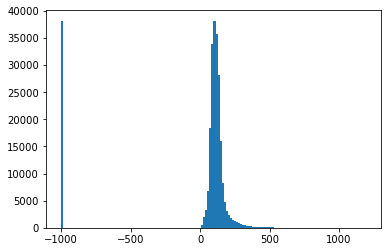

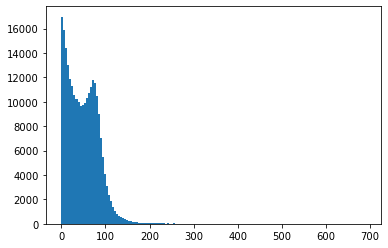

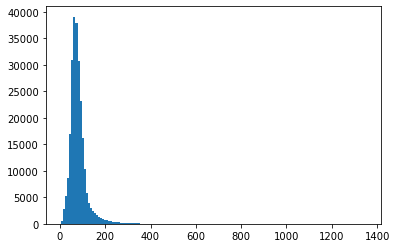

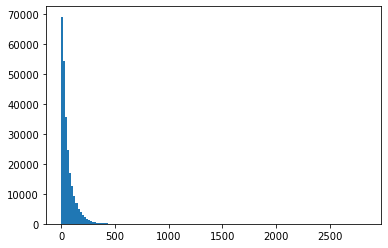

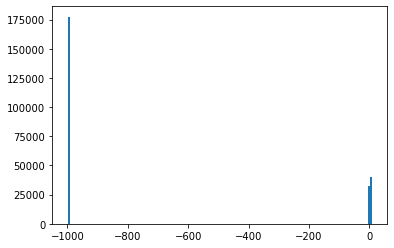

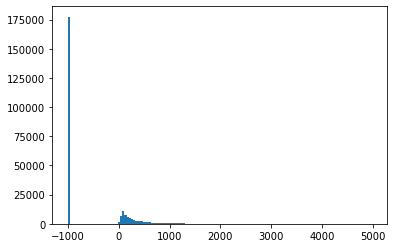

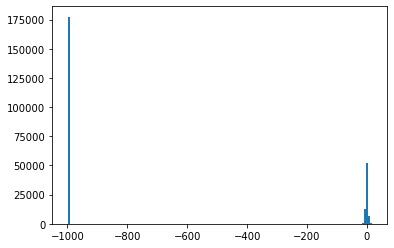

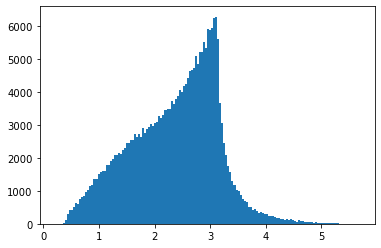

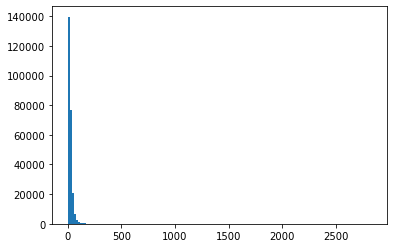

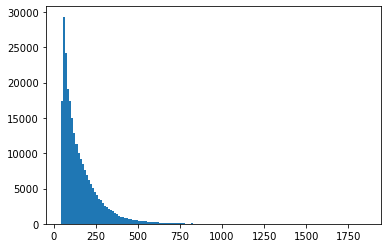

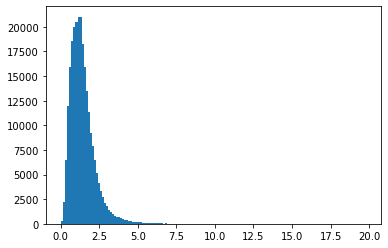

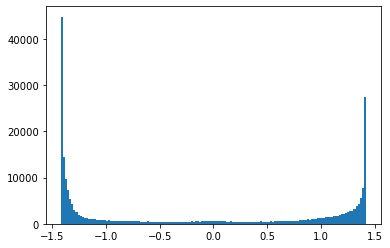

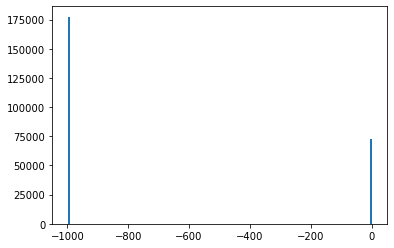

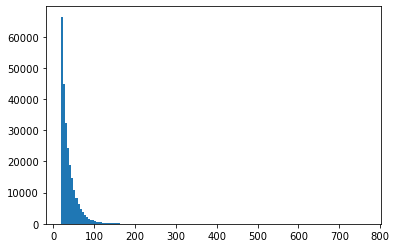

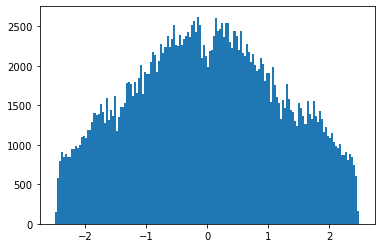

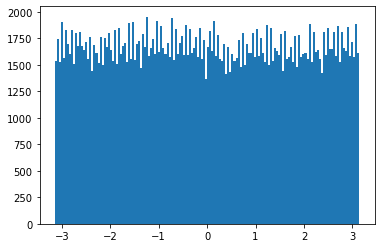

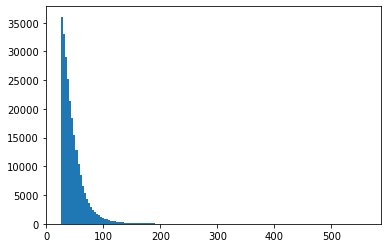

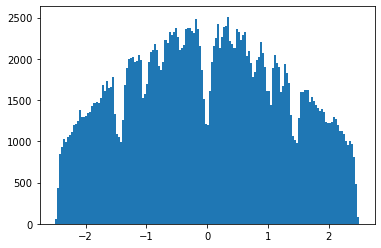

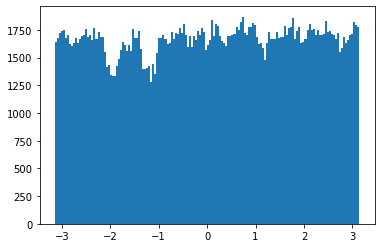

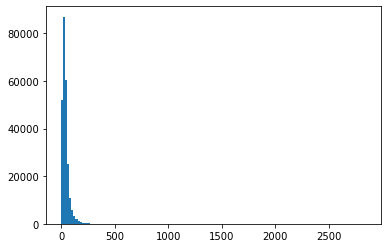

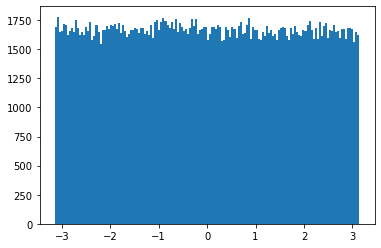

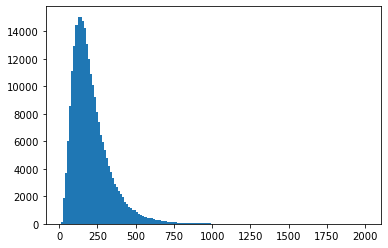

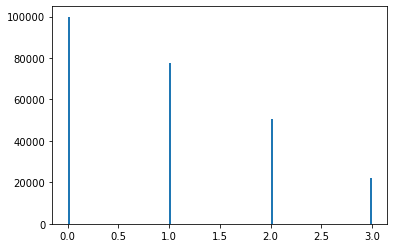

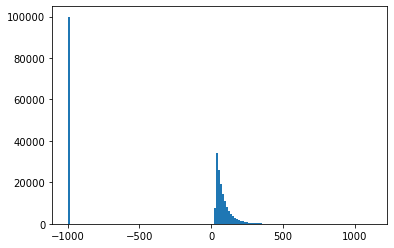

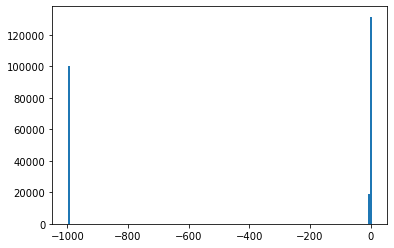

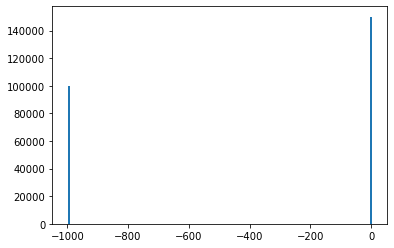

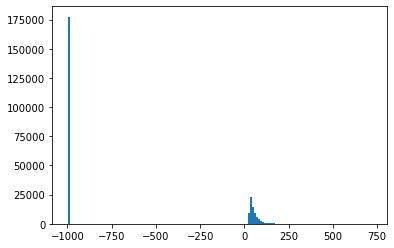

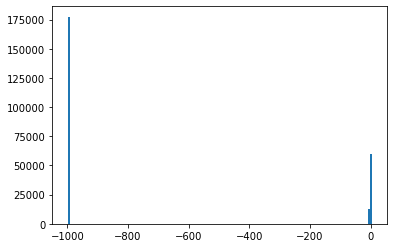

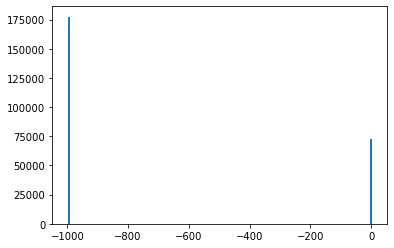

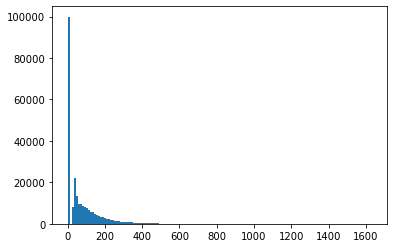

In [12]:
#Viz data (non linear)

for i in range(30):
    plt.hist(tX[:,i], bins=150)
    plt.show() 

In [13]:
sub= tX[:,0]

#print(np.where(sub == -999)[0].shape)
#print(sub.shape)
#print((38114/250000)*100)

a= np.array([2,-999,1,2,3,-999])
print(np.where(a == -999)[0].shape)

(2,)


## Do your thing crazy machine learning thing here :) ...

In [14]:
np.std?

## Generate predictions and save ouput in csv format for submission:

In [15]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

OSError:  not found.

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)